# Social Network Analysis

**Student name: Yuhao Wu**
**Student number: 1000651984**

In [0]:
! pip install networkx
! pip install plotly
! pip install colorlover

In [0]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import colorlover as cl
from IPython.display import HTML
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Q1. Choose a hash-tag (#travel)


In [0]:
# Import the data 
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [0]:
# View the #travel information
travel_Tag = df[df["tweet"].str.lower().str.contains("#travel", na=False)].copy()

In [0]:
travel_Tag.head()

,date,user,tweet
4557,2009-06-11 17:06:31,immadiva,My Dad should win the #Whiteflash.com cufflink...
9083,2009-06-11 17:11:31,goplanit,"If you want to explore the real Madrid, you sh..."
10552,2009-06-11 17:13:10,whereivebeen,Looking for some free things to do in London? ...
11490,2009-06-11 17:13:50,sea4ever,@ecopond Top 10 Eco-Travel Mistakes- What envi...
11912,2009-06-11 17:14:18,carmarazz,Just added myself to the http://wefollow.com t...


# Q2. Build a Mention Graph

In [0]:
# the funciton is copied directly from the lab mateiral
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
# The funciton is copied directly from the lab mateiral
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [0]:
# Add mentioend column 
addMentionedColumn(travel_Tag)
# Create mention graph
TravelGraph = mentionGraph(travel_Tag)

## (a) How many nodes and how many edges in your mention graph?

In [0]:
print("# nodes:", len(TravelGraph.nodes()))
print("# edges:", len(TravelGraph.edges()))

# nodes: 462
# edges: 450


## (b) Build a histogram of the graph nodes’ degree (i.e., the degree distribution of the graph). What can you learn from the degree distribution?


In [0]:
travel_Tag

,date,user,tweet,mentioned
4557,2009-06-11 17:06:31,immadiva,My Dad should win the #Whiteflash.com cufflink...,"[stylittv, char_sos, mdsteelergal, suzika, lbi..."
9083,2009-06-11 17:11:31,goplanit,"If you want to explore the real Madrid, you sh...",[]
10552,2009-06-11 17:13:10,whereivebeen,Looking for some free things to do in London? ...,[]
11490,2009-06-11 17:13:50,sea4ever,@ecopond Top 10 Eco-Travel Mistakes- What envi...,[ecopond]
11912,2009-06-11 17:14:18,carmarazz,Just added myself to the http://wefollow.com t...,[]
...,...,...,...,...
3421617,2009-06-14 23:36:53,deelishdiscord,Interesting. The foot stand on the bus moves l...,[]
3427692,2009-06-14 23:45:28,megoizzy,RT @whereivebeen: 15 Incredible Cliff Faces ht...,[whereivebeen]
3428287,2009-06-14 23:46:43,beijingfairmont,RT @fabulousjourney Fabulous Journeys: The Man...,"[fabulousjourney, velvetescape)]"
3428910,2009-06-14 23:47:40,mattcarnavos,Follow @EverywhereTrip: he's been on a trip ar...,[everywheretrip]


In [0]:
# Calculate the node degree
Node_derge = list(dict(nx.degree(TravelGraph)).values())

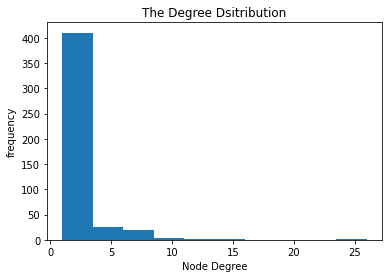

In [0]:
plt.hist(x = Node_derge ,bins = 10)
plt.title("The Degree Dsitribution")
plt.xlabel ("Node Degree")
plt.ylabel("frequency")
plt.show()

As shown in the bar graph, we have high freqeuncy when the node dergee is low. This is to say, we have only a few accounts (or users) which are mentioned (@) by a great number of people.

## (c) Provide a list of top 5 edges with highest weights (edges are identified be the two nodes they connects, e.g., ⟨node1, node2⟩).


In [0]:
def EdgeWeight (Graph):
  node1 =[]
  node2=[]
  weights = []
  for a, b in Graph.edges():
    node1.append(a)
    node2.append(b)
    weights.append(Graph[a][b]['numberMentions'])
  return node1, node2, weights


In [0]:
node1,node2, weights = EdgeWeight(TravelGraph)
# Created a pd for show the edge weight
Edge_weights = pd.concat([pd.DataFrame(node1,columns = ['Node 1']), pd.DataFrame(node2,columns = ['Node 2']),pd.DataFrame(weights,columns = ['Edge Weight'])],axis = 1)
Edge_weights.sort_values('Edge Weight',ascending = False).head()

,Node 1,Node 2,Edge Weight
242,tweetmeme,love_slovenia,4
24,flyersview,airportsleeper,4
235,video_travel,globe_tourism,3
291,hashtravel,hyperren,3
372,vacationinfo,islandjacks,3


In [0]:
Edge_Weight_Max = Edge_weights.sort_values('Edge Weight',ascending = False).head().values[0][2] # extract the first row and 3rd col (#2 column)

In [0]:
Edge_Weight_Min = Edge_weights.sort_values('Edge Weight',ascending = True).head().values[0][2]

## (d) Provide a visualization of the mention graph in which the edge color reflects its weight (i.e., the number of mentions).


In [0]:
# The following code is directly copied from lab material
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [0]:
edgeWidth = TravelGraph['tweetmeme']['love_slovenia'] ['numberMentions']
edgeWidth
#(edgeWidth - Edge_Weight_Min)/(Edge_Weight_Max - Edge_Weight_Min)

4

In [0]:
def plotNetwork(graph):
    
    # add color based on centrality
    closenessCentr = nx.closeness_centrality(graph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    cells = 300
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int((cells - 1)*(edgeWidth - Edge_Weight_Min)/(Edge_Weight_Max - Edge_Weight_Min))
        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width = edgeWidth,color=purd300[edgeColor])) # add width to the line
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=5,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [0]:
addRandomPositions(TravelGraph)

In [0]:
configure_plotly_browser_state()
plotNetwork(TravelGraph)

In [0]:
TravelGraph.nodes['immadiva']['pos']

(30.702383073737142, -3.42772829324488)

# Q3. Content Analysis

### (a) Analyze the most common words in all the tweets with the chosen hash-tag, and provide a basic description of the main themes.

In [0]:
# Store the stopwords in Stop_words
Stop_words = set(stopwords.words('english'))
# In addition to common stop words, we would add several filters
Stop_words.add('http') 
Stop_words.add('com')
Stop_words.add('www')
Stop_words.add('travel')
Stop_words.add('twitter')

# The follwoing function is modifed fro 
def corpus_count_words(Tweets):
  word_counter = Counter()
  for tweet in Tweets:
    # Modified from SNA lab coding - finding most coomon has tags
    Words_total = [word.strip(""" ,.:-'\";""").lower() for word in tweet.split() 
    if len(word) >3
    if not word.startswith("www.")
    if not word.startswith("#")
    if not word.startswith("@")
    if not word.startswith("http")]

    Words_cleaned = [word for word in Words_total if not word in Stop_words]
    word_counter.update(Words_cleaned)
  
  return word_counter

In [0]:
# Top words that appear across all tweets for the travel hash-tag
pd.DataFrame(corpus_count_words(travel_Tag['tweet'].values).most_common(10), columns=["Word", "Count"])

,Word,Count
0,added,145
1,directory,144
2,check,68
3,airgorilla,58
4,save,45
5,hotel,45
6,(travelto),45
7,bank,31
8,roll,31
9,best,30


As shown above, the theme could be related to hotel including checking in out, or how to save time and money. In addition, 'airgorilla' is hotel and airplane tickets booking website, people could talk about buying tikcets from this web.

### (b) In the visualization of the mention graph, add hover information for the nodes, describing the 3 most common words for this user. Add any other hover information that may help you understand the social network better.

In [0]:
travel_Tag[travel_Tag['user'] == '4everequine']['tweet'].values

array(['RT @Siddeley: 49 Hour $49 All-Inclusive Sale! 3+ star hotels $49 person per nite! Hotel only or pkgs w/air! Cheap Caribbean #travel http ...'],
      dtype=object)

In [0]:
def User_Top3_Words(df, TaggedUsers):
    user_Common_Words = dict()
    for TaggedUser in TaggedUsers:
      # Select top 3 words for each #travel tagged user
      Topk_Words = corpus_count_words(df[df['user']==TaggedUser]['tweet'].values).most_common(3)
      Count = len(df[df['user']==TaggedUser]['tweet']) # count the numebr of tweets for this taged user
      words = dict()
      words = {word:count for (word,count) in Topk_Words} # store top k words and counts to dict
      user_Common_Words[TaggedUser] = {'Number of Tweets':Count, 'words':words} # store user, top k wors and counts to dict
    return user_Common_Words

In [0]:
userTopK = User_Top3_Words(travel_Tag,TravelGraph.nodes())
def Text_on_graph (name):
  topWords = ''
  Tweets_Counts = userTopK[name]['Number of Tweets']
  userTopWords = userTopK[name]['words']

  for word,count in userTopWords.items():
    topWords += '{0}: {1} '.format(word,count)
  return "Username: {0}; Number of tweets: {1}; Top 3 Words: [{2}]".format(name,Tweets_Counts,topWords)


In [0]:
def plotNetworkSizeColor(graph):
    #closenessCentr = nx.closeness_centrality(graph)
    #maxCentr = max(closenessCentr.values())
    #minCentr = min(closenessCentr.values())
    cells = 300
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int((cells - 1)*(edgeWidth - Edge_Weight_Min)/(Edge_Weight_Max - Edge_Weight_Min))
        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgeColor]))
        scatters.append(s)

    for node in graph.nodes():
        #nodeCentr = closenessCentr[node]
        #nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        
        xPos, yPos = graph.nodes[node]['pos']
        
        
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text=Text_on_graph(node),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color='#888', 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
# Plot network with top words (k=3), where size is number of tweets
configure_plotly_browser_state()
plotNetworkSizeColor(TravelGraph)

The three important words are: 1) user name to identfy the user, number of this users' tweets taged by 'travel', and the top three words. For example, user,whereievbeen, has 16 tweets which has a three top words of 'best','tweeps','beverage'.

#Q4. Centrality Analysis

In this question, your need to analyze centrality of users in the mention graph.
Here is a list of networkx functions that calculate the different centrality measures:
https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html Note that PageRank lives in a different place in networkx:
https://networkx.github.io/documentation/stable/reference/algorithms/link analysis.html

### (a) Choose two centrality measures and calculate the centrality of the nodes on your graph based on each of the measures.

In [0]:
# betweeness is chosen for this section
nx.betweenness_centrality(TravelGraph)

{'': 0.0004715646515137225,
 '4everequine': 0.0,
 '_mi_chele_': 0.0,
 'aahaa': 0.0,
 'aairwaves': 0.0,
 'abetterstay': 0.0,
 'adambartosik': 0.0065547486560407426,
 'addtoany': 0.0,
 'adey77': 0.0,
 'adventure': 0.0,
 'adventuredeals': 0.0,
 'adventuregirl': 0.0,
 'aerochannel': 0.0,
 'africafreak': 0.0010940299915118362,
 'aiki14': 0.0,
 'airbnb': 0.0,
 'aircrewbuzz': 9.43129303027445e-06,
 'airporthotel': 0.032657895564148505,
 'airportsleeper': 0.023632462510610203,
 'airportsleeper)': 4.715646515137225e-06,
 'airtransport': 0.0,
 'alanperlman': 0.0,
 'albaman2': 0.0,
 'alchemist': 0.0,
 'aliciagetswired': 4.715646515137225e-06,
 'amandakathryn': 0.0,
 'amoyal': 0.0,
 'amyhale': 0.002197491276053947,
 'amywal': 0.0,
 'anca_foster': 0.0,
 'andrew_be': 0.0,
 'andrewblanda': 0.0,
 'andrewghayes': 0.002197491276053947,
 'angelamoriarty': 0.0,
 'angeltowndesign': 0.0,
 'angesbiz': 0.0,
 'aoltravel': 0.0,
 'apokrisis': 0.0,
 'aprilboone': 0.0,
 'argentbeauquest': 9.43129303027445e-06,
 'a

In [0]:
# The closeness centrality is chosen for the second measure
nx.closeness_centrality(TravelGraph)

{'': 0.01952277657266811,
 '4everequine': 0.06544163783367096,
 '_mi_chele_': 0.014789982252021296,
 'aahaa': 0.061991948156635064,
 'aairwaves': 0.05833819875644047,
 'abetterstay': 0.10014888083314738,
 'adambartosik': 0.08765798720893933,
 'addtoany': 0.0021691973969631237,
 'adey77': 0.004958165478772854,
 'adventure': 0.08382256363310712,
 'adventuredeals': 0.012514600367094944,
 'adventuregirl': 0.08225524422999501,
 'aerochannel': 0.070616273881161,
 'africafreak': 0.08957509250988899,
 'aiki14': 0.014789982252021296,
 'airbnb': 0.0028922631959508315,
 'aircrewbuzz': 0.004338394793926247,
 'airporthotel': 0.11576664002740038,
 'airportsleeper': 0.09656631924236812,
 'airportsleeper)': 0.09122624628887312,
 'airtransport': 0.0028922631959508315,
 'alanperlman': 0.06504741109973318,
 'albaman2': 0.0021691973969631237,
 'alchemist': 0.07304832267411611,
 'aliciagetswired': 0.07628553157874939,
 'amandakathryn': 0.0028922631959508315,
 'amoyal': 0.004958165478772854,
 'amyhale': 0.0

### (b) Provide a visualization that demonstrates the centrality of each node using a visual property (size, color, etc) for each of the centrality measures.

In [0]:
# The funcion is modified from the lab maeiral
def plotNetworkSizeColor_closeness(graph):
    closenessCentr = nx.closeness_centrality(graph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    cells = 300
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int((cells - 1)*(edgeWidth - Edge_Weight_Min)/(Edge_Weight_Max - Edge_Weight_Min))
        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgeColor]))
        scatters.append(s)

    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        
        xPos, yPos = graph.nodes[node]['pos']
        
        
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor_closeness(TravelGraph)

Closseness: whereivebeen (0.125),spotcoolstuff (0.141),velvetescape (0.136)

In [0]:
def plotNetworkSizeColor_betweenness(graph):
    betweennessCentr = nx.betweenness_centrality(graph)
    maxCentr = max(betweennessCentr.values())
    minCentr = min(betweennessCentr.values())
    cells = 300
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int((cells - 1)*(edgeWidth - Edge_Weight_Min)/(Edge_Weight_Max - Edge_Weight_Min))
        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgeColor]))
        scatters.append(s)

    for node in graph.nodes():
        nodeCentr = betweennessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        
        xPos, yPos = graph.nodes[node]['pos']
        
        
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text = "User: %s\nbetweenness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor_betweenness(TravelGraph)

Betweeness: whereivebeen (0.076),spotcoolstuff (0.094),velvetescape (0.084)

### (c) Identify the key players in the mentioned graph based on the centrality measures.
1. Are the results similar or different? Explain what can be the reason for the observed similarity or difference.
2. What centrality measure produced a more meaningful interpretation? Why?

1) As for the purpose of comparison, both graph have a node size that is propotional to the Degree_Centrality. We could identify the same top users from both graph. This could be due to the fact that the nodes are not strongly connected. For example, most people sharing the travel related tweets are not actually friends on tweeters.


2) The betweeness measure is more meaningful than closeness because it is much easier to define the key users from the betweeness graph. We could see that many nodes have similar closeness value which makes us difficult to find the key nodes.

# Q5. Connectivity Patterns

## (a) Calculate two or more of the following measures to analyze cliques in your mention graph:
1. Number of maximal cliques in your graph.
2. The graph’s clique number (size of the largest clique in the graph).
3. Number of maximal cliques for each node
4. Size of the largest maximal clique containing each given node.

In [0]:
#1 Return number of maximal cliques using find_cliques or graph_number_of_cliques
count = 0
for clique in nx.find_cliques(TravelGraph):
  count+= 1
print('The number of maximal cliques: {0}'.format(count))

The number of maximal cliques: 394


In [0]:
#2 graph's clique number: size of the largest clique in the graph.
print('The graph clique number: {0}'.format(nx.graph_clique_number(TravelGraph)))

The graph clique number: 3


In [0]:
#3 Number of maximal cliques for each node
Max_cliques = nx.number_of_cliques(TravelGraph).items()
MaxClique_df = pd.DataFrame(Max_cliques,columns = ['users','Maximal Clique']).sort_values('Maximal Clique',ascending = False)
MaxClique_df

,users,Maximal Clique
55,whereivebeen,24
34,velvetescape,13
29,spotcoolstuff,12
0,immadiva,11
38,natalanihawaii,10
...,...,...
197,fltadvisor,1
194,jinnywjgb,1
193,dieargentyn,1
192,latamforless,1


In [0]:
# number of useres Vs number of maxiaml cliques
MaxClique_df.groupby(['Maximal Clique']).count()

,users
Maximal Clique,
1,318
2,74
3,30
4,10
5,13
6,4
7,3
8,3
9,1


In [0]:
#4 Size of the largest maximal clique containing each given node.
# .node_clique_number : Returns the size of the largest maximal clique containing each given node.
MaxClique_size = nx.node_clique_number(TravelGraph).items()
MaxClique_size_df = pd.DataFrame(MaxClique_size,columns = ['user','Max clique size']).sort_values('Max clique size',ascending = False)
MaxClique_size_df

,user,Max clique size
306,chic_travel,3
142,video_travel,3
185,wejustgotback,3
186,budtravel,3
83,solotraveler,3
...,...,...
173,ciaolaura,2
172,italytravelista,2
171,hoteltweeter,2
170,gaytravelpros,2


In [0]:
# Number of users who has size of the largest maixmal clique of 1, 2 and 3
MaxClique_size_df.groupby(['Max clique size']).count()

,user
Max clique size,
1,1
2,402
3,59


### (b) Provide some insights on the connectivity patterns of your mention graph based on the information calculated in (a). What was the largest clique? How large was it? What else do your clique properties and cliques themselves tell you about the social network?

The majority of the users (318/426) have only one maximal clique. This implies that the users taged by # travel is not strongly connected. Most of the users are probably connceting only one user. Thus, this may form many isolated user pairs meaning that they could be small gorups of friends. In addition, we have around 5 users/nodes having more than 10 cliques, which means that these people are probably the center for the # travel related topics.

The largest maximum clique size is 3. For example, the largest maximal cliques for the node: 'chic_travel' has 3 nodes conncted. Also, the node 'whereivebeen' has the higehest number of maxiaml cliques for #travel topic, this means that the node is probabbly the centre.

Furthermore, we have only 1 user has the size of largest maximal clique of being 1, 402 users have the size of largest maximal cliques of being 2, and 59 users have the size of largest maixal cliques of being 3. This is to say, the majority of the nodes are connected within a small groups